# **Import Libraries**

In [1]:
import pandas as pd              # Data handling, cleaning, tabular operations
import numpy as np               # Numerical computations, arrays, stats
import matplotlib.pyplot as plt  # Static plotting (line, bar, histograms)
import seaborn as sns            # Advanced visualizations built on Matplotlib

# Machine Learning Utilities

from sklearn.model_selection import train_test_split  # Splits data into train/test sets
from sklearn.preprocessing import StandardScaler       # Normalizes/standardizes numerical features
from sklearn.ensemble import RandomForestRegressor     # Ensemble ML model for regression tasks

# Model Evaluation Metrics

from sklearn.metrics import (
    mean_absolute_error,        # Measures average magnitude of errors
    mean_squared_error,         # Penalizes larger errors more than MAE
    r2_score                    # Measures model’s explanatory power
)

import warnings
warnings.filterwarnings("ignore")  # Suppresses unnecessary warnings for cleaner output

In [3]:
# Load Dataset
df = pd.read_csv(r"D:\New folder\Retail and wherehouse Sale.csv")

In [4]:

print(df.info())           # Structural metadata: rows, columns, dtypes, nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              30000 non-null  int64  
 1   MONTH             30000 non-null  int64  
 2   SUPPLIER          29967 non-null  object 
 3   ITEM CODE         30000 non-null  object 
 4   ITEM DESCRIPTION  30000 non-null  object 
 5   ITEM TYPE         30000 non-null  object 
 6   RETAIL SALES      29999 non-null  float64
 7   RETAIL TRANSFERS  30000 non-null  float64
 8   WAREHOUSE SALES   30000 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.1+ MB
None


In [5]:
df.describe()      # Statistical summary of numerical features

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,30000.0,30000.000000,29999.000000,30000.000000,30000.000000
mean,2020.0,3.911467,6.939796,6.594058,27.431031
std,0.0,2.836788,33.081054,27.879428,272.166085
min,2020.0,1.000000,-0.420000,-6.000000,-3999.000000
25%,2020.0,1.000000,0.000000,0.000000,0.000000
50%,2020.0,3.000000,0.160000,0.000000,1.000000
75%,2020.0,7.000000,2.920000,3.000000,6.000000
max,2020.0,9.000000,2739.000000,1507.000000,18317.000000


In [6]:
df.isnull().sum()

YEAR                 0
MONTH                0
SUPPLIER            33
ITEM CODE            0
ITEM DESCRIPTION     0
ITEM TYPE            0
RETAIL SALES         1
RETAIL TRANSFERS     0
WAREHOUSE SALES      0
dtype: int64

In [7]:
df.head()           # Preview first 5 rows for sanity-check

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


# **EDA**

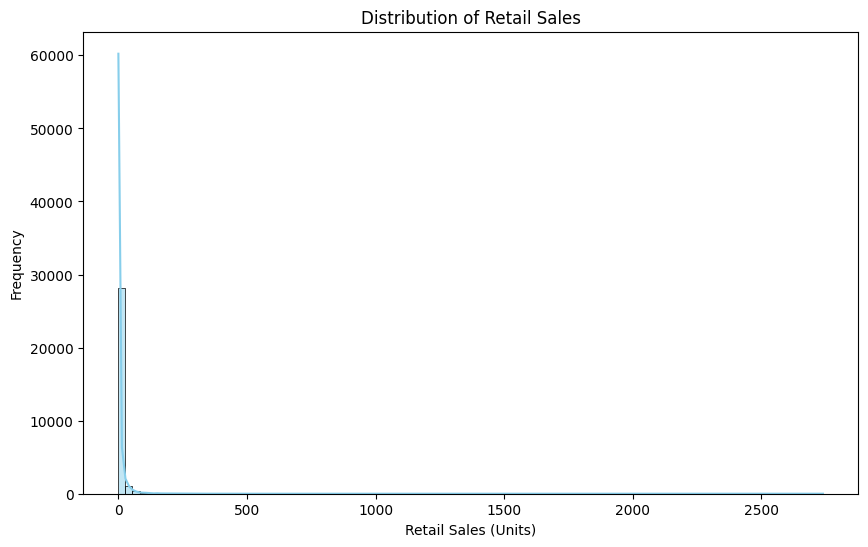

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['RETAIL SALES'], kde=True, bins=100, color='skyblue')
plt.title('Distribution of Retail Sales')
plt.xlabel('Retail Sales (Units)')
plt.ylabel('Frequency')
plt.show()

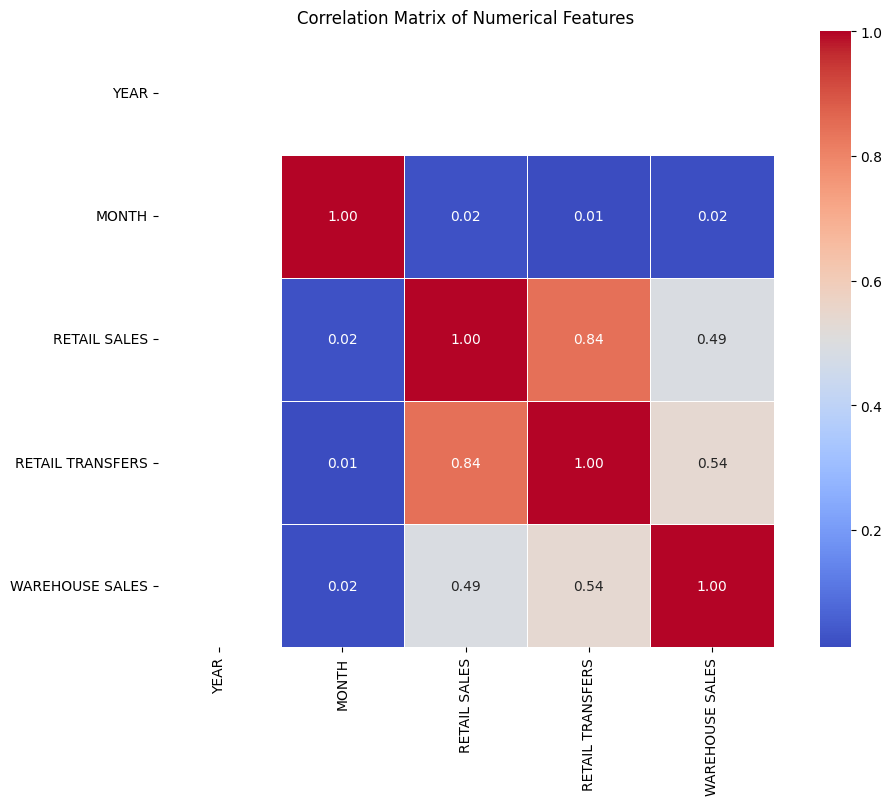

In [9]:
numeric_df = df.select_dtypes(include=[np.number])


plt.figure(figsize=(12, 8))

sns.heatmap(
    numeric_df.corr(),      # Correlation matrix
    annot=True,             # Display correlation values
    cmap='coolwarm',        # Divergent color map for better contrast
    fmt='.2f',              # Show decimals to 2 places
    linewidths=0.5,         # Cleaner grid separation
    square=True             # Makes each cell square-shaped
)

plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [10]:
df['Date'] = pd.to_datetime(df[['YEAR', 'MONTH']].assign(DAY=1))

print(df[['YEAR', 'MONTH', 'Date']].head())

   YEAR  MONTH       Date
0  2020      1 2020-01-01
1  2020      1 2020-01-01
2  2020      1 2020-01-01
3  2020      1 2020-01-01
4  2020      1 2020-01-01


In [11]:
categorical_cols = ['SUPPLIER', 'ITEM CODE', 'ITEM DESCRIPTION', 'ITEM TYPE']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [16]:
X = df.drop(columns=['RETAIL SALES', 'Date'])
y = df['RETAIL SALES']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Model**

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

MemoryError: Unable to allocate 2.80 GiB for an array with shape (15667, 24000) and data type object

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Sales Revenue (USD)')
plt.ylabel('Predicted Sales Revenue (USD)')
plt.title('Actual vs Predicted Sales Revenue')
plt.show()


In [ ]:
# Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=y_pred, lowess=True, color='g')
plt.xlabel('Actual Sales Revenue (USD)')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()
